# Assignment 4: Text Classification on TREC dataset

We are going to use the TREC dataset for this assignment, which is widely considered a benchmark text classification dataset. Read about the TREC dataset here (https://huggingface.co/datasets/CogComp/trec), also google it for understanding it better.

This is what you have to do - use the concepts we have covered so far to accurately predict the 5 coarse labels (if you have googled TERC, you will surely know what I mean) in the test dataset. Train on the train dataset and give results on the test dataset, as simple as that. And experiment, experiment and experiment!

Your experimentation should be 4-tiered-

i) Experiment with preprocessing techniques (different types of Stemming, Lemmatizing, or do neither and keep the words pure). Needless to say, certain things, like stopword removal, should be common in all the preprocesssing pipelines you come up with. Remember never do stemming and lemmatization together. Note - To find out the best preprocessing technique, use a simple baseline model, like say CountVectorizer(BoW) + Logistic Regression, and see which gives the best accuracy. Then proceed with that preprocessing technique only for all the other models.

ii) Try out various vectorisation techniques (BoW, TF-IDF, CBoW, Skipgram, GloVE, Fasttext, etc., but transformer models are not allowed) -- Atleast 5 different types

iii) Tinker with various strategies to combine the word vectors (taking mean, using RNN/LSTM, and the other strategies I hinted at in the end of the last sesion). Note that this is applicable only for the advanced embedding techniques which generate word embeddings. -- Atleast 3 different types, one of which should definitely be RNN/LSTM

iv) Finally, experiment with the ML classifier model, which will take the final vector respresentation of each TREC question and generate the label. E.g. - Logistic regression, decision trees, simple neural network, etc. - Atleast 4 different models

So applying some PnC, in total you should get more than 40 different combinations. Print out the accuracies of all these combinations nicely in a well-formatted table, and pronounce one of them the best. Also feel free to experiment with more models/embedding techniques than what I have said here, the goal is after all to achieve the highest accuracy, as long as you don't use transformers. Happy experimenting!

NOTE - While choosing the 4-5 types of each experimentation level, try to choose the best out of all those available. E.g. - For level (iii) - Tinker with various strategies to combine the word vectors - do not include 'mean' if you see it is giving horrendous results. Include the best 3-4 strategies.

### Helper Code to get you started

I have added some helper code to show you how to load the TERC dataset and use it.

In [ ]:
!pip install -q datasets --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load TREC dataset
dataset = load_dataset("trec", trust_remote_code=True)

train_data = pd.DataFrame(dataset['train'])
test_data = pd.DataFrame(dataset['test'])

print(train_data.head())
print("Labels:", train_data['coarse_label'].unique())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

trec.py:   0%|          | 0.00/5.09k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5452 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

                                                text  coarse_label  fine_label
0  How did serfdom develop in and then leave Russ...             2          26
1   What films featured the character Popeye Doyle ?             1           5
2  How can I find a list of celebrities ' real na...             2          26
3  What fowl grabs the spotlight after the Chines...             1           2
4                    What is the full form of .com ?             0           1
Labels: [2 1 0 3 5 4]


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure all necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text, method="none"):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]

    if method == "stem":
        tokens = [stemmer.stem(t) for t in tokens]
    elif method == "lemm":
        tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return " ".join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Choose one of: "none", "stem", "lemm"
method = "lemm"

train_data['clean_text'] = train_data['text'].apply(lambda x: preprocess(x, method))
test_data['clean_text'] = test_data['text'].apply(lambda x: preprocess(x, method))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Choose either CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_data['clean_text'])
X_test = vectorizer.transform(test_data['clean_text'])

y_train = train_data['coarse_label']
y_test = test_data['coarse_label']


📊 Naive Bayes Accuracy: 0.5640
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.34      0.67      0.45        94
           2       0.65      0.25      0.36       138
           3       0.53      0.86      0.65        65
           4       0.70      0.62      0.66        81
           5       0.91      0.70      0.79       113

    accuracy                           0.56       500
   macro avg       0.52      0.52      0.49       500
weighted avg       0.63      0.56      0.55       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


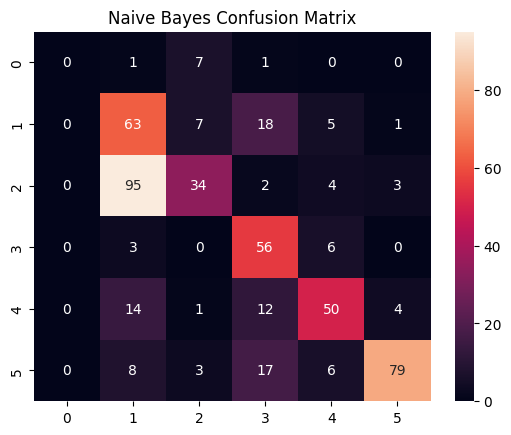

📊 Logistic Regression Accuracy: 0.7480
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.70      0.62      0.66        94
           2       0.76      0.89      0.82       138
           3       0.60      0.89      0.72        65
           4       0.71      0.68      0.70        81
           5       0.99      0.65      0.79       113

    accuracy                           0.75       500
   macro avg       0.79      0.73      0.75       500
weighted avg       0.78      0.75      0.75       500



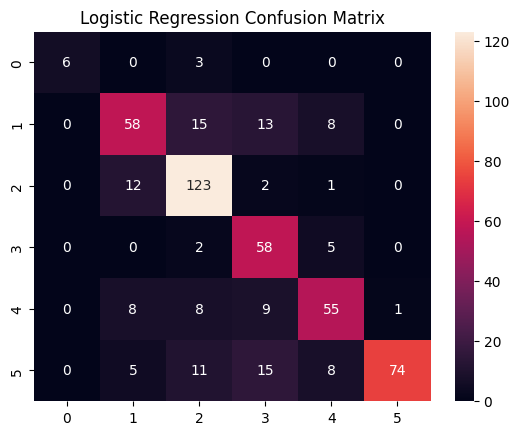

📊 SVM Accuracy: 0.7520
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.67      0.63      0.65        94
           2       0.78      0.83      0.80       138
           3       0.64      0.88      0.74        65
           4       0.71      0.73      0.72        81
           5       0.93      0.70      0.80       113

    accuracy                           0.75       500
   macro avg       0.79      0.76      0.76       500
weighted avg       0.77      0.75      0.75       500



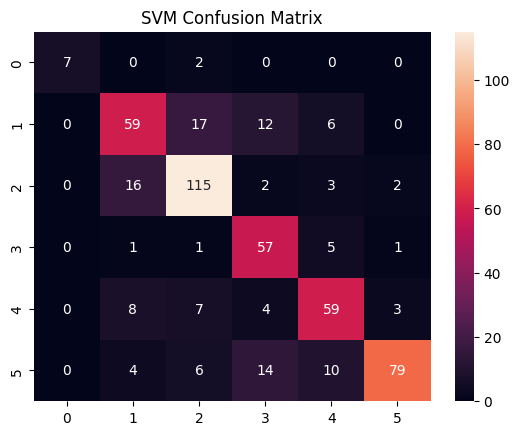

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Run all 3 models
evaluate(MultinomialNB(), "Naive Bayes")
evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")
evaluate(LinearSVC(), "SVM")